In [ ]:
%autosave 300
# %autoreload 100

Autosaving every 300 seconds


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
  #general
  import os
  import numpy as np
  import pandas as pd

  #plotting
  import matplotlib.pyplot as plt
  from matplotlib.colors import ListedColormap

  #mapping
  import geopandas as gpd
  import folium
  from folium.plugins import MarkerCluster,HeatMap,HeatMapWithTime
  import branca.colormap as colormap
  from collections import defaultdict

# Loading data

# Data
What is the project and why is it important?

    Microplastics are plastic debris pieces that are smaller than five millimeters in size. They can be found in most habitats on Earth as well as in the digestive tracts of many marine organisms and sea birds. As more research is done on this type of debris, the need for global standardization of sampling methods has been recognized. Since there is no single agreed-upon method for counting and weighing microplastics in water samples, it is difficult to compare results across studies. Although common approaches may be used, most laboratories develop their own procedures for microplastic sampling and processing based on factors such as budget, equipment availability, labor, and the specific research questions being asked. “Interlaboratory comparisons” are performed in many scientific fields, during which multiple labs are asked to analyze identical samples in order to test their ability to produce reliable and repeatable measurements; this can be a step toward the development of standardized sampling methods.

    This project was composed of two parts aimed to address the standardization of microplastic sampling protocols. First, a standardized laboratory protocol was developed for isolating and quantifying microplastic debris in environmental samples. Second, an interlaboratory comparison was conducted to evaluate if protocols used by various labs for quantifying microplastics in water samples were comparable.

    For the first stage of the project, researchers from the University of Washington Tacoma created a simple, cost-effective, and unbiased laboratory method to quantify microplastic debris in environmental samples. The protocol focuses on the filtration, separation, and quantification of many common microplastics. The protocol varies slightly depending on whether the sample is beach sand, bed sediment, or water, but the general procedure includes an initial sieving/separation of the sample, the removal of organic matter, a second separation, and finally drying, sorting, and weighing the sample. For more, access the full laboratory protocol.

    The interlaboratory comparison was the second part of this project and to our knowledge, is the first study to compare different laboratory protocols for isolating and quantifying microplastic debris in water samples. To start, reference samples were created by adding known amounts of microplastic particles and organic matter to filtered water. These samples were then mailed to six national and international research laboratories well-versed in microplastic research. These laboratories used their own protocols to filter, isolate, and quantify the microplastic debris. Researchers reported their results to the team at the University of Washington Tacoma and comparisons were made between the known microplastic values from the reference samples and the values reported from each of the laboratories.

src: https://www.kaggle.com/brsdincer/marine-microplastic-on-world-density-noaa

In [ ]:
adv_sci = gpd.read_file('/content/ADVENTURE_MICRO_FROM_SCIENTIST.csv',)
geomar = gpd.read_file('/content/GEOMARINE_MICRO.csv')
sea_micro = gpd.read_file('/content/SEA_MICRO.csv')

In [ ]:
#create a geom obj
def get_geom(df,adn):
    '''get a geometry variable'''
    df[['Latitude','Longitude']]=df[['Latitude','Longitude']].astype(dtype=float)
    df[adn] = df[adn].astype(dtype=float)
#     df[['Latitude','Longitude']]=df[['Latitude','Longitude']].astype('float16')
    df['Geometry'] = pd.Series([(df.loc[i,'Latitude'],df.loc[i,'Longitude']) for i in range(len(df['Latitude']))])

def to_datetime(df,date_col='Date',frmt='%Y-%m-%d'):
    '''add_date col as datetime'''
    df[date_col] =pd.to_datetime(df[date_col],errors='coerce')
    df['year'] = df[date_col].dt.year

#get geometry
get_geom(adv_sci,'Total_Pieces_L')
get_geom(geomar,'MP_conc__particles_cubic_metre_')
get_geom(sea_micro,'Pieces_KM2')

#set to datetime'
to_datetime(adv_sci)
to_datetime(geomar)
to_datetime(sea_micro)

In [ ]:
#create a geom obj
def get_geom(df,adn):
    '''get a geometry variable'''
    df[['Latitude','Longitude']]=df[['Latitude','Longitude']].astype(dtype=float)
    df[adn] = df[adn].astype(dtype=float)
#     df[['Latitude','Longitude']]=df[['Latitude','Longitude']].astype('float16')
    df['Geometry'] = pd.Series([(df.loc[i,'Latitude'],df.loc[i,'Longitude']) for i in range(len(df['Latitude']))])

def to_datetime(df,date_col='Date',frmt='%Y-%m-%d'):
    '''add_date col as datetime'''
    df[date_col] =pd.to_datetime(df[date_col],errors='coerce')
    df['year'] = df[date_col].dt.year

#get geometry
get_geom(adv_sci,'Total_Pieces_L')
get_geom(geomar,'MP_conc__particles_cubic_metre_')
get_geom(sea_micro,'Pieces_KM2')

#set to datetime'
to_datetime(adv_sci)
to_datetime(geomar)
to_datetime(sea_micro)

# Exploratory Data Analysis

**Helper code**

In [ ]:
def plot_hist(arr,
              label,
              ax1=None,
              n_bins=30):

    if not ax1:
        ax1=plt.figure(figsize=(12,6))

    plt.hist(arr,bins=n_bins)
    plt.title(f'Histogram {label}')
    plt.ylabel('Count')
    plt.xlabel(f'{label}')


def plot_yearly_average(df,
                        col,
                        title):
    ax1=plt.figure(figsize=(14,7))

    df1= df.copy()

    gb = df1.groupby('year').agg({col:['mean','median']}).droplevel(level=0,axis=1)
    gb.reset_index(inplace=True)

    plt.plot(gb['year'],gb['mean'],color='b',label=f'mean {col}')
    plt.plot(gb['year'],gb['median'],color='g',label=f'median {col}')

    plt.xlabel('Year')
    plt.ylabel(f'{title}')
    plt.title(f'Yearly Average {title}')
    plt.legend()
    plt.show()

# Adventure Scientist data

In [ ]:
#set style for visualization
plt.style.use('seaborn-white')

<ipython-input-32-6d36b867f679>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


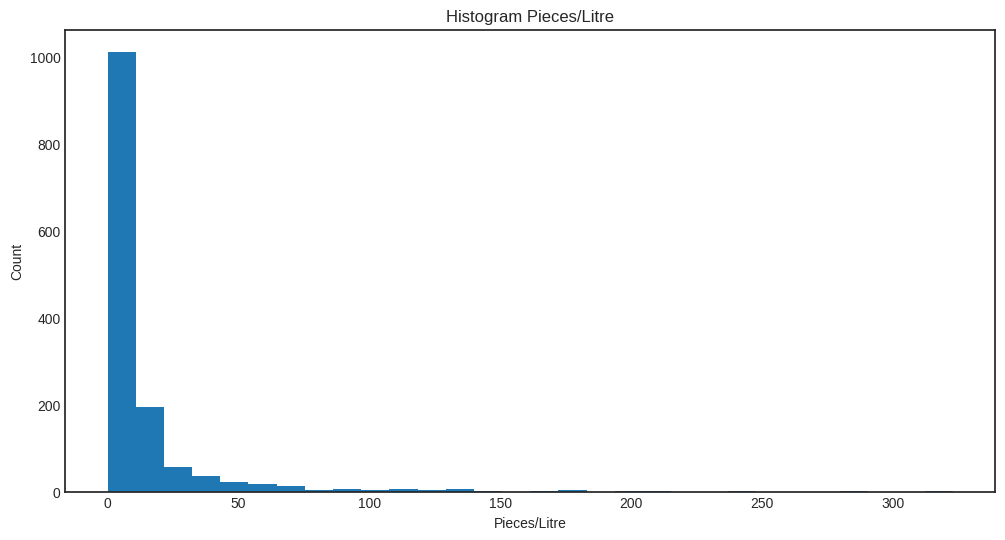

In [ ]:
#distribution of data
plot_hist(arr=adv_sci['Total_Pieces_L'],
         label='Pieces/Litre',
         n_bins=30)

In [ ]:
#find loc with most dense

max_plas = adv_sci['Total_Pieces_L'].max()
idx= adv_sci[adv_sci['Total_Pieces_L']==max_plas].index
date1=str(adv_sci.loc[idx,'Date'].values).split('T')[0].split('[')[1]
loc1= adv_sci.iloc[idx][['Latitude','Longitude']].values

print('Maximum plastic found per Litre is {} on date {} at {}'.format(max_plas,date1,loc1))


Maximum plastic found per Litre is 323.0 on date '2015-11-12 at [[ 34.2     -77.26667]]


In [ ]:
#plotting area of study
start_loc= (np.mean(adv_sci['Latitude']),np.mean(adv_sci['Longitude']))

#map
m_1=folium.Map(location=start_loc,
              tiles='Open Street Map',
              zoom_start=2,
              min_zoom=1.5)

#heatmap:
HeatMap(data=adv_sci[['Latitude','Longitude','Total_Pieces_L']].values,
        radius=10,
        blur=5).add_to(m_1)

#add area of highest concentration
folium.CircleMarker(location= (loc1[0][0],loc1[0][1]),
                  tooltip="<b>max plastic density</b>",
                  color='black',
                  radius=15).add_to(m_1)


print('Study area Heatmap (Adventure Scientist) ')
m_1

Study area Heatmap (Adventure Scientist) 


# **Yearly TimeSeries of the Adventure Sci data**

In [ ]:
m_2=folium.Map(location=start_loc,
              tiles='Open Street Map',
              zoom_start=2,
              min_zoom=1.5)



d1= defaultdict(list)

for row in adv_sci.itertuples():
    d1[row.Date.month].append([row.Latitude,row.Longitude,row.Total_Pieces_L])

h1=HeatMapWithTime(data=list(d1.values()),
                index=list(d1.keys()),
                radius=10,
                min_opacity=0.1,
                max_opacity=0.6,
                auto_play=True).add_to(m_2)

print('Month by month Visualization of Adv Sci Data')

m_2

Month by month Visualization of Adv Sci Data


# GeoMarine Data

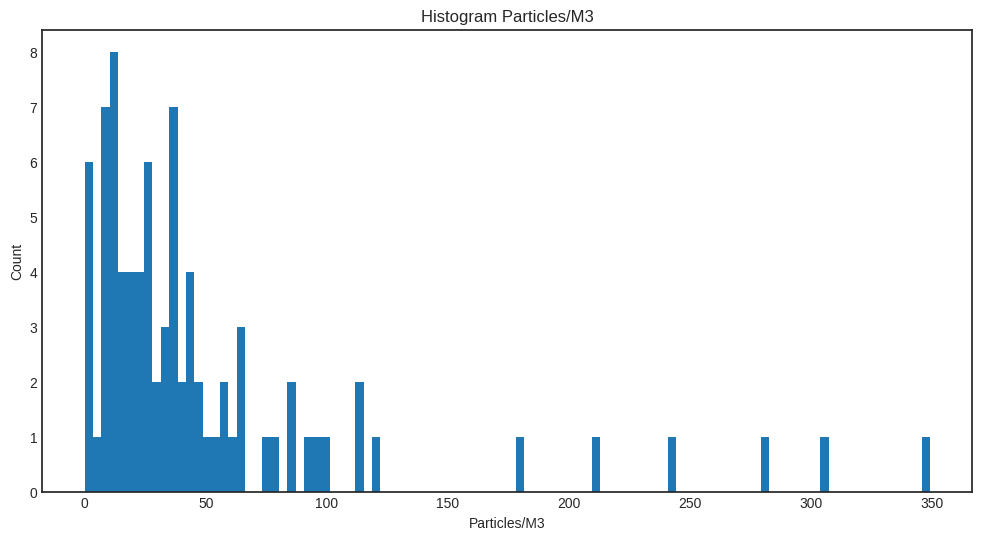

In [ ]:
#distribution of data
plot_hist(arr=geomar['MP_conc__particles_cubic_metre_'],
         label='Particles/M3',
         n_bins=100)

In [ ]:
# geomar['Datto_listd.to_datetime(geomar['Date'],errors='coerce')

mas_plas = geomar['MP_conc__particles_cubic_metre_'].max()
loc2=geomar[geomar['MP_conc__particles_cubic_metre_']==mas_plas][['Latitude','Longitude']].values

print('Maximum micro plastic concentration found per Cubic Meter is {} at {}'.format(max_plas,
                                                                     loc2))


Maximum micro plastic concentration found per Cubic Meter is 323.0 at [[ 21.50771174 119.5476918 ]]


In [ ]:
#plotting area of study
start_loc= (geomar['Latitude'].mean(),geomar['Longitude'].mean())

#map
m_3=folium.Map(location=start_loc,
              tiles='Open Street Map',
              zoom_start=2,
              min_zoom=1.5)

#heatmap:
HeatMap(data=geomar[['Latitude','Longitude','MP_conc__particles_cubic_metre_']],
        radius=10,
        blur=5,
        opacity=.1).add_to(m_3)

#add area of highest concentration
folium.CircleMarker(location= (loc2[0][0],loc2[0][1]),
                  tooltip="<b>max plastic density</b>",
                  color='black',
                  radius=15).add_to(m_3)


print('Study area Heatmap (GeoMarine) ')
m_3

Study area Heatmap (GeoMarine) 


# TimeSeries Visualization of Geomar Data.

In [ ]:
m_4=folium.Map(location=start_loc,
              tiles='Open Street Map',
              zoom_start=2,
              min_zoom=1.5)



d2= defaultdict(list)

for row in geomar.itertuples():
    d2[row.Date.month].append([row.Latitude,row.Longitude,row.MP_conc__particles_cubic_metre_])

h2=HeatMapWithTime(data=list(d2.values()),
                index=list(d2.keys()),
                radius=10,
                min_opacity=0.1,
                max_opacity=0.6,
                auto_play=True,
               control=True,
                show=True).add_to(m_4)


print('Monthwise time series visualization of geomar data')

m_4

Monthwise time series visualization of geomar data


# SEA data

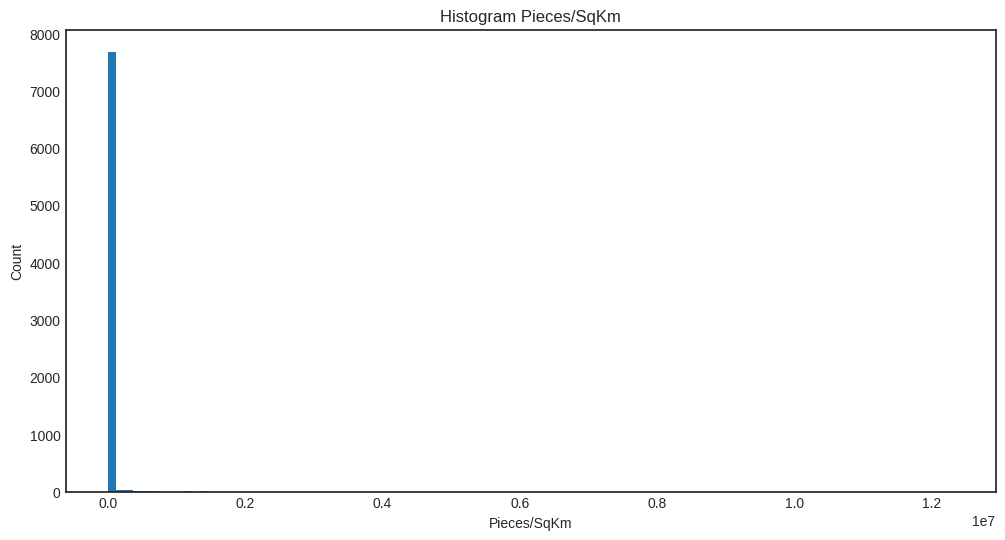

In [ ]:
#distribution of data
plot_hist(arr=sea_micro['Pieces_KM2'],
         label='Pieces/SqKm',
         n_bins=100)

In [ ]:
#find max pollution reion


mas_plas = sea_micro['Pieces_KM2'].max()
loc3=sea_micro[sea_micro['Pieces_KM2']==mas_plas][['Latitude','Longitude']].values

print('Maximum micro plastic concentration found per Cubic Meter is {} at {}'.format(max_plas,
                                                                     loc3))

Maximum micro plastic concentration found per Cubic Meter is 323.0 at [[  28.72 -140.03]]


In [ ]:
#plotting area of study
start_loc= (sea_micro['Latitude'].mean(),sea_micro['Longitude'].mean())

#map
m_5=folium.Map(location=start_loc,
              tiles='Open Street Map',
              zoom_start=2,
              min_zoom=1.5)

#heatmap:
HeatMap(data=sea_micro[['Latitude','Longitude','Pieces_KM2']],
        radius=10,
        blur=5,
        opacity=.1).add_to(m_5)

#add area of highest concentration
folium.CircleMarker(location= (loc3[0][0],loc3[0][1]),
                  tooltip="<b>max plastic density</b>",
                  color='black',
                  radius=15).add_to(m_5)


print('Study area Heatmap (SeaMicro) ')
m_5

Study area Heatmap (SeaMicro) 


# Visualizing sea_micro TimeSeries

In [ ]:
m_6=folium.Map(location=start_loc,
              tiles='Open Street Map',
              zoom_start=2,
              min_zoom=1.5)



d3= defaultdict(list)

for row in sea_micro.itertuples():
    d3[row.Date.month].append([row.Latitude,row.Longitude,row.Pieces_KM2])

h3=HeatMapWithTime(data=list(d2.values()),
                index=list(d2.keys()),
                radius=10,
                min_opacity=0.1,
                max_opacity=0.6,
                auto_play=True,
               control=True,
                show=True).add_to(m_6)


print('Monthwise time series visualization of Sea_Micro data')

m_6

Monthwise time series visualization of Sea_Micro data
